In [1]:
from collections import defaultdict
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
from select_k_dataset import load_dataframe, get_dataset
df = load_dataframe("select_k_times.json")
df = df[(df.use_memory_pool == True)]
df = df[(df.index_type == 'int64_t') & (df.key_type == 'float')]
df

,key_type,index_type,algo,row,col,k,use_index_input,use_memory_pool,time
0,float,int64_t,kRadix8bits,1,1024,1,0,1,0.000017
1,float,int64_t,kRadix11bits,1,1024,1,0,1,0.000012
2,float,int64_t,kRadix11bitsExtraPass,1,1024,1,0,1,0.000012
3,float,int64_t,kWarpImmediate,1,1024,1,0,1,0.000009
4,float,int64_t,kWarpFiltered,1,1024,1,0,1,0.000010
...,...,...,...,...,...,...,...,...,...
21405,float,int64_t,kRadix11bits,7,1254,7696,0,1,0.000015
21406,float,int64_t,kRadix11bitsExtraPass,7,1254,7696,0,1,0.000015
21407,float,int64_t,kRadix8bits,7,2189,7960,0,1,0.000030
21408,float,int64_t,kRadix11bits,7,2189,7960,0,1,0.000019


In [3]:
def generate_plot(df, x_axis="col", title=""):
    fig, ax = plt.subplots()
    for algo in sorted(set(df.algo)):
        current = df[(df.algo == algo) & (df.time < np.inf)]
        ax.plot(current[x_axis], current["time"], label=algo)
    ax.set_xscale('log', base=2)
    ax.set_yscale('log', base=2)
    ax.set_xlabel(x_axis)
    ax.set_ylabel("time(s)")
    ax.set_title(title)
    fig.set_dpi(200)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
#    fig.legend()
    plt.show()

def generate_k_plot(df, col, row):
    return generate_plot(df[(df.col == col) & (df.row == row)], "k", f"#cols={col}, #rows={row}")

def generate_col_plot(df, row, k):
    return generate_plot(df[(df.row == row) & (df.k == k)], "col", f"#rows={row}, k={k}")

def generate_row_plot(df, col, k):
    return generate_plot(df[(df.col == col) & (df.k == k)], "row", f"#cols={col}, k={k}")

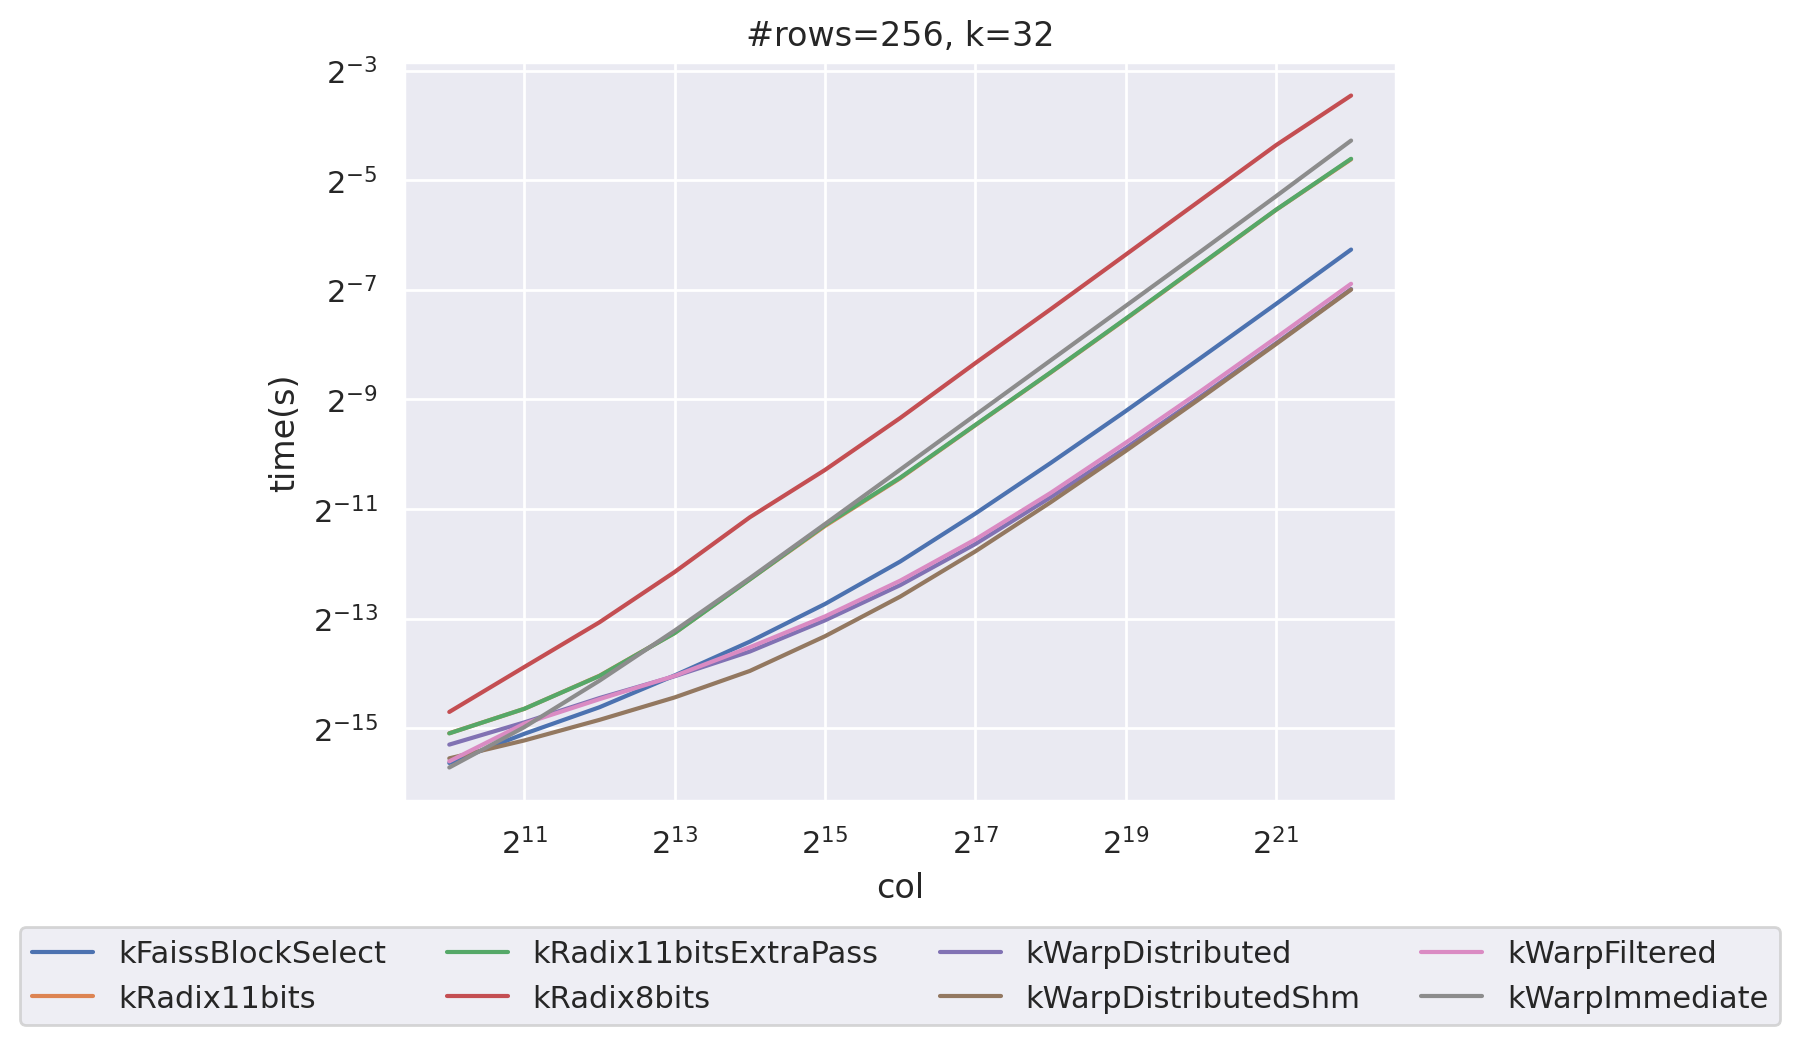

In [4]:
generate_col_plot(df, 256, 32)

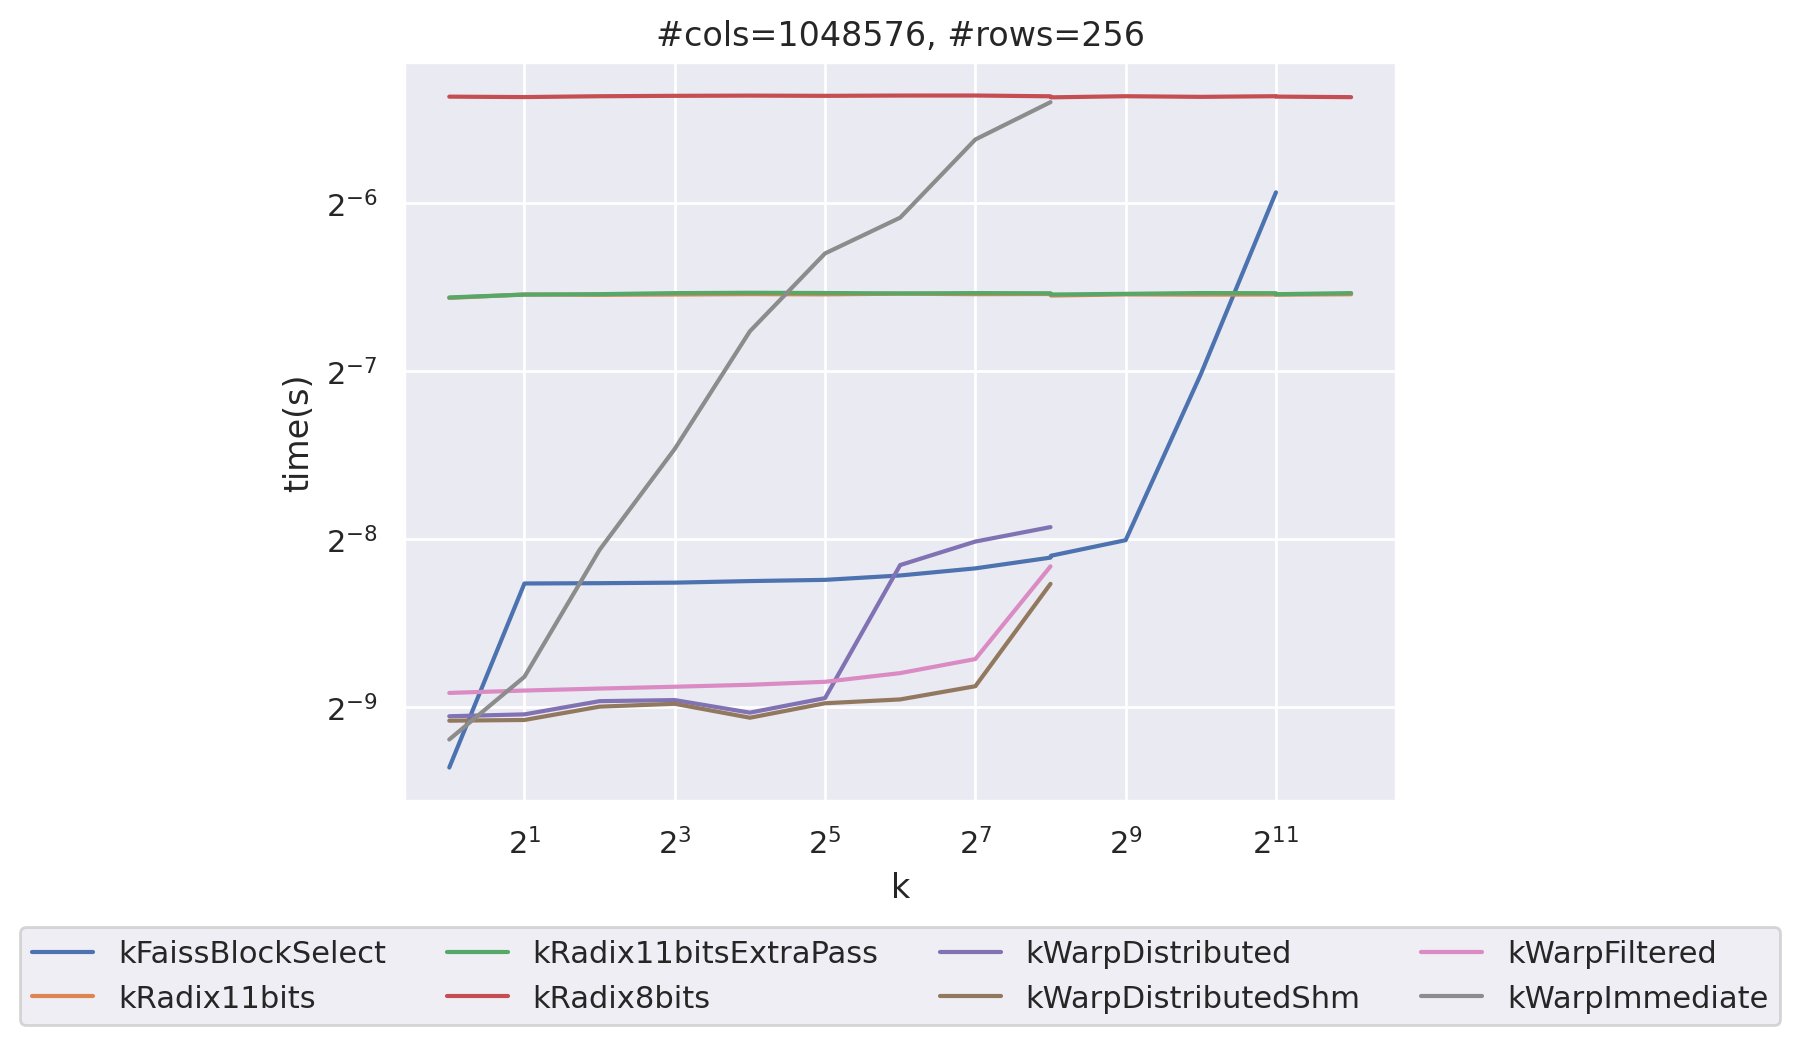

In [5]:
generate_k_plot(df, 2**20, 256)